# Les ARBRES DE DECISION avec SCIKIT-LEARN

 Voyons en détails comment fonctionne l'Arbre de Décision avec Scikit-Learn et surtout comment utiliser ses hyperparamètres pour l'améliorer.

L'Arbre de décision, aussi appelé Decision Tree est un algorithme de Machine Learning permettant de classifier des données en se basant sur des suites de conditions.


Après avoir compris ce qu'est un Décision Tree, on analysera les différents les hyperparamètres qu'il propose.

Arrivera t-on à améliorer notre modèle en modifiant les hyperparamètres ?
C'est ce qu'on va voir dans cet article !

## Chargons les data 

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('winequality/winequality-white.csv', sep = ';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Les données sont ceux qui récencent les caractéristiques des vins classés en fonction de leur qualité

Nous avons au total 4898 enregistrements et 12 attributs dont 11 features et 1 label

L'objectif est de prédire la qualité des vins en fonction des features.

Effectuons d'abord une préparation des données 

## Prétraitement

In [2]:
#Tableau de corrélation
corr_df= df.corr()
abs(corr_df).style.background_gradient(cmap = 'coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.022697,0.289181,0.089021,0.023086,0.049396,0.091070,0.265331,0.425858,0.017143,0.120881,0.113663
volatile acidity,0.022697,1.000000,0.149472,0.064286,0.070512,0.097012,0.089261,0.027114,0.031915,0.035728,0.067718,0.194723
citric acid,0.289181,0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,0.163748,0.062331,0.075729,0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,0.194133,0.026664,0.450631,0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,0.090439,0.016763,0.360189,0.209934
free sulfur dioxide,0.049396,0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,0.000618,0.059217,0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,0.448892,0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,0.093591,0.074493,0.780138,0.307123
pH,0.425858,0.031915,0.163748,0.194133,0.090439,0.000618,0.002321,0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,0.017143,0.035728,0.062331,0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,0.017433,0.053678


On constate une forte corrélation ( > 0.75 ) entre les attributs "density" et "residual sugar" mais aussi entre les attributs "density" et "alcohol".

il sera donc convenable pour nous de supprimer la colonne "density".

In [3]:
#suppression de la colonne density
df = df.drop(['density'], axis= 1)
df = df.drop(['free sulfur dioxide'], axis= 1)

Visualisons la repartition des exemples par classes

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

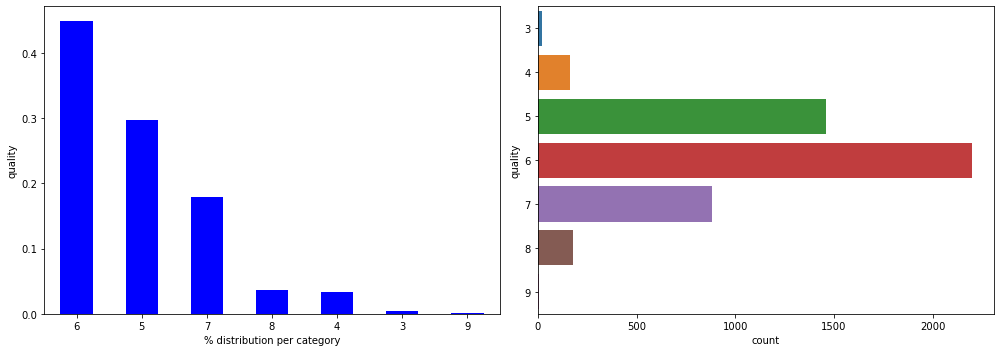

In [5]:
plt.figure(figsize=(14, 5))
plt.subplot(1,2,1)
df['quality'].value_counts(normalize = True).plot.bar(rot =0, color = 'blue')
plt.ylabel('quality')
plt.xlabel('% distribution per category')
plt.subplot(1,2,2)
sns.countplot(data = df, y='quality')
plt.tight_layout()
plt.show()

On a 7 classes pour ce dataset.
Les classes 3 et 9 ont un très faible cardinal d'exemples ( < 0.5% du dataset) il pourrait donc aussi etre intéressant de supprimer les enregistrements appartenant aux classes 3 et 9.

In [6]:
#suppression des enregistrements ayant pour classes 3 et 9 et on garde le reste c-à-d ceux de classes 4,5,6,7 et 8 
df = df[df['quality'].isin([4,5,6,7,8])]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,170.0,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,132.0,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,97.0,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,186.0,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,186.0,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,92.0,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,168.0,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,111.0,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,110.0,3.34,0.38,12.8,7


Maintenant nous avons 4873 enregistrements et 11 attributs dont 10 features et 1 label composé de 5 classes

Maintenant on équilibre les enregistrement par classes

In [87]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
Name: quality, dtype: int64

In [120]:
df = pd.concat(  [df[df['quality'] == 4],
            df[df['quality'] == 5].iloc[np.random.randint(low=0, high=1457, size= 163)],
            df[df['quality'] == 6].iloc[np.random.randint(low=0, high=2198, size= 163)],
            df[df['quality'] == 7].iloc[np.random.randint(low=0, high=880, size= 163)],
            df[df['quality'] == 8].iloc[np.random.randint(low=0, high=175, size= 163)]],
          axis = 0,
          ignore_index = True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol,quality
0,6.2,0.450,0.26,4.4,0.063,206.0,3.27,0.52,9.8,4
1,9.8,0.360,0.46,10.5,0.038,83.0,2.89,0.30,10.1,4
2,5.5,0.485,0.00,1.5,0.065,103.0,3.63,0.40,9.7,4
3,6.4,0.595,0.14,5.2,0.058,97.0,3.38,0.36,9.0,4
4,7.6,0.480,0.37,0.8,0.037,100.0,3.03,0.39,11.4,4
...,...,...,...,...,...,...,...,...,...,...
810,5.8,0.170,0.34,1.8,0.045,170.0,3.38,0.90,11.8,8
811,6.6,0.500,0.26,11.3,0.029,110.0,3.27,0.78,12.9,8
812,8.0,0.450,0.36,8.8,0.026,151.0,3.07,0.25,12.7,8
813,7.3,0.300,0.34,2.7,0.044,108.0,3.36,0.53,12.8,8


Le dataset est pret à etre utilisé.

## Division des données 



Dans la suite nous divisons nos données en utilisant la methode Holdout; une pour l'entrainement et l'autre pour le test

In [122]:
from sklearn.model_selection import train_test_split

#separarons les features des labels
features = df.drop(['quality'], axis= 1)
labels = df[['quality']]

#Prenons 20% des enregistrements pour le test et le reste pour l'entrainement

X_train, X_test, y_train, y_test = train_test_split (features, labels, test_size = 0.2, random_state = 12)

## Comprendre le Decision Tree

### En théorie

En Machine Learning, 'Arbre de Décision s'utilise lors des tache de classification.

L'algorithme analyse les données en se basant sur les features (fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, pH, sulfates, alcohol) pour prédire à quelle classe appartient chaque vin (quality).

il commmence avec le feature qu'il trouve le plus pertinent, et crée deux sous groupes.

par exemple s'il analyse que les vins de qualité 3 ont un taux d'alcool inférieur à 7%, il peut creer deux sous groupes: le groupes des vins inférieur à 7% ( et de qualité 3) et les groupes de vins supérieur à 7% (et de qualité 4,5,6,7,8,9).
Ainsi le taux d'alcool est une règle de décision pour discriminer nos données et les clasifier.

Le Decision Tree continue ce processus jusqu'à obtenir des groupes qui correspondent le mieux possible à chacune de nos classes et ainsi classifier l'ensemble du dataset.

Cependant, dans la pratique, une seule règle ne permet pas forcément une discrimination parfaite de nos données.
Effectivement, ils epeut ue avec un taux d'alcool inférieur à 7% il n'y ait pas seulement des vins de qualité 3, mais aussi d'autres de qualité 4 et 5.
il faudra donc poursivre la création de règle de discrimination sur ce groupe de données.

C'est ainsi que le Decision Trzee peut se retrouver rapidement avec un nombre de règles importantes. Surtout si nos features sont complexes et peut corrélées avec nos labaels comme le montre notre analyse du taux de corrélation  entre attributs ci-dessus.

## Dans la pratique 

Le Decision Tree se compose de racine, de branches, et de feuilles.

Dans un noeud, l'algorithme teste un feature de notre dataset pour classifier les données. C'est là qu'il crée une règle de discrimination.

Le test effectué a 2 résultats possibles: Vrai ou Faux.
Par exemple, dans notre cas, un test peut etre: le taux d'alcool est-il inférieur à 7% ?

Dans les 2 cas, l'arbre de décision créera deux chemins; C'est deux options créent deux branches qui amènent à un autre noeud où un autre test sera effectué pour discriminer nos données.

Le premier noeud est appelé la racine.
Le noeud finale d'une branche est applé une feuille: il signifie la prise de décision.

La profondeur d'un arbre est défini par la longueur du chemin le plus long entre la racine et une feuille. 

## Description l'Arbre de décision avec Scikit-Learn

### Les hyperparamètres 

### Les attributs de tailles

## Implémentons l'Arbre de décision avec Scikit-Learn

In [158]:
from sklearn import tree

#construction du modèle
decisionTree = tree.DecisionTreeClassifier(max_depth=4, ccp_alpha = 0.005)

In [154]:
#entrainement du modèle
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.007, max_depth=5)

In [155]:
#calcul de sa performance
decisionTree.score(X_test,y_test)

0.4049079754601227

In [156]:
y_pred = decisionTree.predict(X_test)

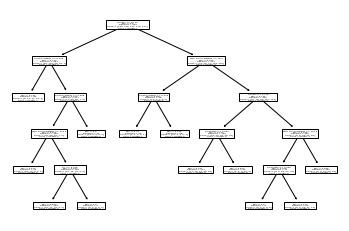

<Figure size 720x576 with 0 Axes>

In [157]:
tree.plot_tree(decisionTree, 
               feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol'], 
               class_names =['quality 6', 'quality 5', 'quality 7', 'quality 8', 'quality 4'] )
plt.figure(figsize=(10,8))
plt.show()